# Hőtérkép a hazai és idegenbeli lőtt gólok számáról, a top 5 bajnokságban 2000 és 2023 között

Programcsomagok importálása

In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Adatok importálása

In [4]:
df = pd.read_csv('A top 5 bajnokság 2000-2023 között lejátszott összes mérkőzésének végkimenetele.csv')
df2 = df

Adatok szétbontása bajnokságonként

In [5]:
eng_df = df2.loc[df2['League'] == 'Premier-League']
spa_df = df2.loc[df2['League'] == 'La-Liga']
ita_df = df2.loc[df2['League'] == 'Serie-A']
ger_df = df2.loc[df2['League'] == 'Bundesliga']
fra_df = df2.loc[df2['League'] == 'Ligue-1']

eng_df.head(5)

,Season,League,Wk,Date,Home,Score,Away,Home_score,Away_score,GD,Sum_G
0,2001,Premier-League,1.0,2000-08-19,Leeds United,2–0,Everton,2,0,2,2
1,2001,Premier-League,1.0,2000-08-19,Liverpool,1–0,Bradford City,1,0,1,1
2,2001,Premier-League,1.0,2000-08-19,Chelsea,4–2,West Ham,4,2,2,6
3,2001,Premier-League,1.0,2000-08-19,Tottenham,3–1,Ipswich Town,3,1,2,4
4,2001,Premier-League,1.0,2000-08-19,Coventry City,1–3,Middlesbrough,1,3,2,4


Százalékokat tartalmazó mátrix kialakítása

In [6]:
eng_df2 = pd.crosstab(eng_df['Home_score'], eng_df['Away_score']).div(len(eng_df))
spa_df2 = pd.crosstab(spa_df['Home_score'], spa_df['Away_score']).div(len(spa_df))
ita_df2 = pd.crosstab(ita_df['Home_score'], ita_df['Away_score']).div(len(ita_df))
ger_df2 = pd.crosstab(ger_df['Home_score'], ger_df['Away_score']).div(len(ger_df))
fra_df2 = pd.crosstab(fra_df['Home_score'], fra_df['Away_score']).div(len(fra_df))

eng_df2

Away_score,0,1,2,3,4,5,6,7,9
Home_score,,,,,,,,,
0,0.077117,0.073227,0.045995,0.023913,0.010526,0.003089,0.000915,0.000114,0.000114
1,0.103890,0.110526,0.064531,0.027803,0.010069,0.002517,0.001030,0.000114,0.000000
2,0.083982,0.086728,0.050000,0.018650,0.004233,0.001373,0.000343,0.000000,0.000000
3,0.042792,0.045767,0.021625,0.009382,0.002059,0.000458,0.000229,0.000000,0.000000
4,0.019794,0.016819,0.007780,0.004691,0.001373,0.000229,0.000000,0.000000,0.000000
5,0.007780,0.005378,0.002288,0.001373,0.000229,0.000114,0.000000,0.000000,0.000000
6,0.002174,0.002403,0.000915,0.000458,0.000114,0.000000,0.000000,0.000000,0.000000
7,0.000801,0.000572,0.000343,0.000114,0.000114,0.000000,0.000000,0.000000,0.000000
8,0.000458,0.000114,0.000114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Az adatok összeolvasztása oly módon, hogy a százalékos adatok a 0, 1, 2, 3 és 4+ lőtt gólra vonatkozzanak

In [7]:
#eng_df2['4+'] = eng_df2[4] + eng_df2[5] + eng_df2[6] + eng_df2[7] + eng_df2[9]
#eng_df2.loc['4+']= eng_df2.loc[4] +  eng_df2.loc[5] +  eng_df2.loc[6] + eng_df2.loc[7] + eng_df2.loc[8] + eng_df2.loc[9]
#eng_df2.drop([4, 5, 6, 7, 8 , 9], inplace = True)
#eng_df2.drop([4, 5, 6, 7, 9], axis = 1, inplace = True)

eng_df2['4+'] = eng_df2.iloc[:, 4:].sum(axis = 1)
eng_df2.loc['4+'] = eng_df2.iloc[4:, :].sum(axis = 0)
eng_df2 = eng_df2.loc[[0, 1, 2, 3, '4+'], [0, 1, 2, 3, '4+']]

ita_df2['4+'] = ita_df2.iloc[:, 4:].sum(axis = 1)
ita_df2.loc['4+'] = ita_df2.iloc[4:, :].sum(axis = 0)
ita_df2 = ita_df2.loc[[0, 1, 2, 3, '4+'], [0, 1, 2, 3, '4+']]

spa_df2['4+'] = spa_df2.iloc[:, 4:].sum(axis = 1)
spa_df2.loc['4+'] = spa_df2.iloc[4:, :].sum(axis = 0)
spa_df2 = spa_df2.loc[[0, 1, 2, 3, '4+'], [0, 1, 2, 3, '4+']]

ger_df2['4+'] = ger_df2.iloc[:, 4:].sum(axis = 1)
ger_df2.loc['4+'] = ger_df2.iloc[4:, :].sum(axis = 0)
ger_df2 = ger_df2.loc[[0, 1, 2, 3, '4+'], [0, 1, 2, 3, '4+']]

fra_df2['4+'] = fra_df2.iloc[:, 4:].sum(axis = 1)
fra_df2.loc['4+'] = fra_df2.iloc[4:, :].sum(axis = 0)
fra_df2 = fra_df2.loc[[0, 1, 2, 3, '4+'], [0, 1, 2, 3, '4+']]

eng_df2

Away_score,0,1,2,3,4+
Home_score,,,,,
0,0.077117,0.073227,0.045995,0.023913,0.014760
1,0.103890,0.110526,0.064531,0.027803,0.013730
2,0.083982,0.086728,0.050000,0.018650,0.005950
3,0.042792,0.045767,0.021625,0.009382,0.002746
4+,0.031236,0.025400,0.011442,0.006636,0.002174


In [8]:
eng_00 = eng_df2.iloc[0,0]
ita_00 = ita_df2.iloc[0,0]
spa_00 = spa_df2.iloc[0,0]
ger_00 = ger_df2.iloc[0,0]
fra_00 = fra_df2.iloc[0,0]

eng_01 = eng_df2.iloc[0,1]
ita_01 = ita_df2.iloc[0,1]
spa_01 = spa_df2.iloc[0,1]
ger_01 = ger_df2.iloc[0,1]
fra_01 = fra_df2.iloc[0,1]

eng_10 = eng_df2.iloc[1,0]
ita_10 = ita_df2.iloc[1,0]
spa_10 = spa_df2.iloc[1,0]
ger_10 = ger_df2.iloc[1,0]
fra_10 = fra_df2.iloc[1,0]

eng_11 = eng_df2.iloc[1,1]
ita_11 = ita_df2.iloc[1,1]
spa_11 = spa_df2.iloc[1,1]
ger_11 = ger_df2.iloc[1,1]
fra_11 = fra_df2.iloc[1,1]

eng_d = eng_df2.iloc[0,0] + eng_df2.iloc[1,1] + eng_df2.iloc[2,2] + eng_df2.iloc[3,3] + eng_df2.iloc[4,4]
ita_d = ita_df2.iloc[0,0] + ita_df2.iloc[1,1] + ita_df2.iloc[2,2] + ita_df2.iloc[3,3] + ita_df2.iloc[4,4]
spa_d = spa_df2.iloc[0,0] + spa_df2.iloc[1,1] + spa_df2.iloc[2,2] + spa_df2.iloc[3,3] + spa_df2.iloc[4,4]
ger_d = ger_df2.iloc[0,0] + ger_df2.iloc[1,1] + ger_df2.iloc[2,2] + ger_df2.iloc[3,3] + ger_df2.iloc[4,4]
fra_d = fra_df2.iloc[0,0] + fra_df2.iloc[1,1] + fra_df2.iloc[2,2] + fra_df2.iloc[3,3] + fra_df2.iloc[4,4]

print(eng_d, ita_d, spa_d, ger_d, fra_d)

0.2491990846681922 0.2697773567029843 0.2513729977116705 0.24637681159420288 0.28017901307266524


Vizualizáció hőtérképen, a keletkező diagrammok exportálása képként

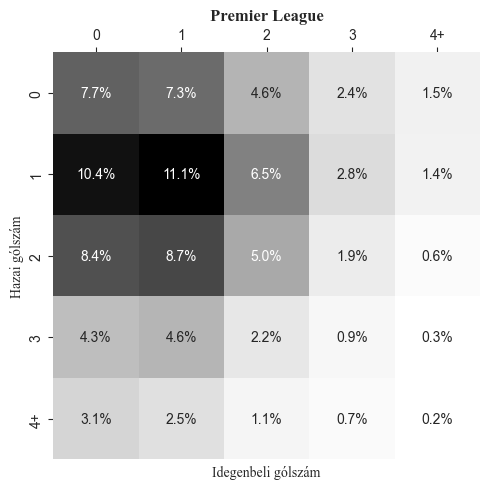

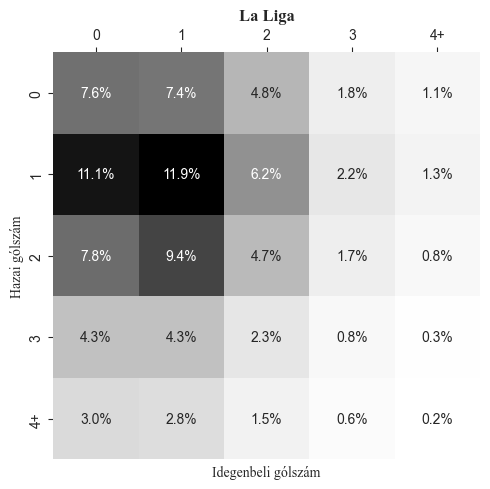

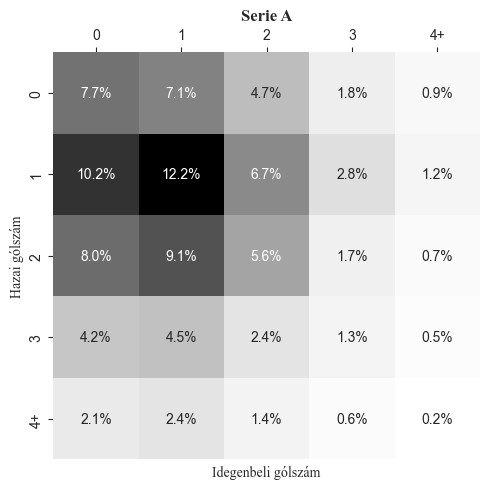

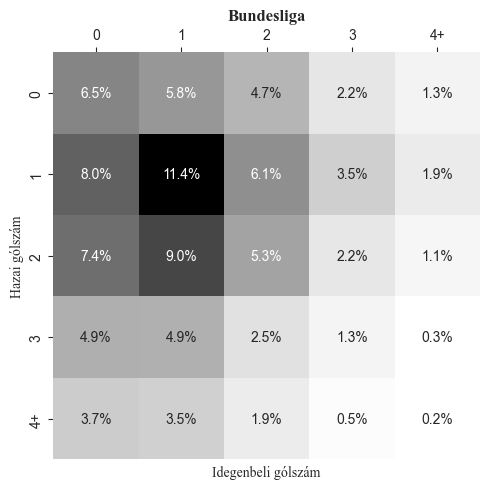

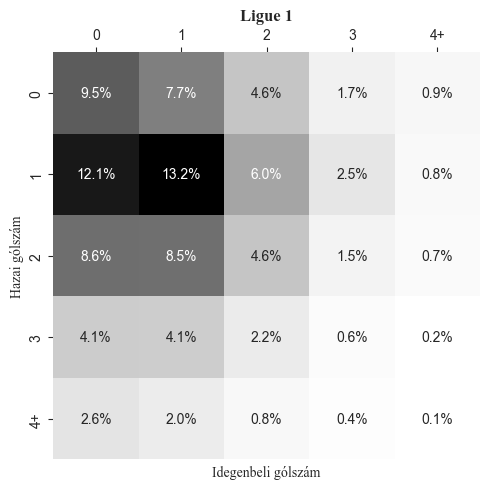

In [10]:
font = {'fontname' : 'Times New Roman'}
colormap = sns.color_palette("Greys", as_cmap=True)
xlab = 'Idegenbeli gólszám'
ylab = 'Hazai gólszám'
params = {'axis' : 'both', 'which' : 'major', 'labelsize' : 10, 'labelbottom' : False,
          'bottom' : False, 'top' : True, 'labeltop' : True}
hparams = {'annot' : True, 'fmt' : '.1%', 'cmap' : colormap, 'cbar' : False, 'annot_kws' :{"size":10}}


fig = plt.figure(figsize = (5,5), linewidth = 1)

sns.set_style("ticks", {'axes.grid' : False})

eng = sns.heatmap(eng_df2, **hparams)

plt.tick_params(**params)

plt.title('Premier League', **font, fontweight = 'bold')
plt.xlabel(xlab, **font) 
#eng.set_xlabel(xlab, loc = 'top')
plt.ylabel(ylab, **font) 
plt.tight_layout()

plt.savefig("pics/eng_heatmap.png")



fig = plt.figure(figsize = (5,5), linewidth = 1)

sns.set_style("ticks", {'axes.grid' : False})

sns.heatmap(spa_df2, **hparams)

plt.tick_params(**params)

plt.title('La Liga', **font, fontweight = 'bold')
plt.xlabel(xlab, **font) 
plt.ylabel(ylab, **font) 
plt.tight_layout()


plt.savefig("pics/spa_heatmap.png")



fig = plt.figure(figsize = (5,5), linewidth = 1)

sns.set_style("ticks", {'axes.grid' : False})

sns.heatmap(ita_df2, **hparams)

plt.tick_params(**params)

plt.title('Serie A', **font, fontweight = 'bold')
plt.xlabel(xlab, **font) 
plt.ylabel(ylab, **font) 
plt.tight_layout()


plt.savefig("pics/ita_heatmap.png")



fig = plt.figure(figsize = (5,5), linewidth = 1)

sns.set_style("ticks", {'axes.grid' : False})

sns.heatmap(ger_df2, **hparams)

plt.tick_params(**params)

plt.title('Bundesliga', **font, fontweight = 'bold')
plt.xlabel(xlab, **font) 
plt.ylabel(ylab, **font) 
plt.tight_layout()


plt.savefig("pics/ger_heatmap.png")



fig = plt.figure(figsize = (5,5), linewidth = 1)

sns.set_style("ticks", {'axes.grid' : False})

sns.heatmap(fra_df2, **hparams)

plt.tick_params(**params)

plt.title('Ligue 1', **font, fontweight = 'bold')
plt.xlabel(xlab, **font) 
plt.ylabel(ylab, **font) 
plt.tight_layout()


plt.savefig("pics/fra_heatmap.png")
